##### 2.6 Customize your own model (5 points)

Now let's experiment by modifying some hyperparameters in the config and costomizing your own model. You should at least change one defalut setting in the config and train a new model. Then visualize the generation image and discuss the effects of your modifications.

**Hint: Possible changes to the configuration include, but are not limited to,  the number of diffusion steps $T$, the unconditional condition drop ratio $mask\_p$, the feature size $num\_feat$, the beta schedule, etc.**

First you should define and print your modified config. Please state all the changes you made to the DMConfig class, i.e. `DMConfig(T=?, num_feat=?, ...)`.

In [7]:
# ==================================================== #
# YOUR CODE HERE:
#   Your new configuration:
#   train_config_new = DMConfig(...)
train_config_new = DMConfig(num_feat = 256, omega = 3.0, mask_p = 0.2, T = 600)

# Initial DMConfig values
#DMConfig(input_dim=(28, 28), num_channels=1, condition_mask_value=-1, num_classes=10, T=400,
         #beta_1=0.0001, beta_T=0.02, mask_p=0.1, num_feat=128, omega=2.0, batch_size=256,
         #epochs=10, learning_rate=0.0001, multi_lr_milestones=[20], multi_lr_gamma=0.1)

# ==================================================== #
print(train_config_new)

DMConfig(input_dim=(28, 28), num_channels=1, condition_mask_value=-1, num_classes=10, T=600, beta_1=0.0001, beta_T=0.02, mask_p=0.2, num_feat=256, omega=3.0, batch_size=256, epochs=10, learning_rate=0.0001, multi_lr_milestones=[20], multi_lr_gamma=0.1)


In [8]:
from utils import solver
solver(dmconfig = train_config_new,
       exp_name = 'LM_experiment_2',
       train_loader = train_loader,
       test_loader = test_loader)

# Due to "out of memory" error - copied necessary code into another notebook to run the last model

epoch 1/10


train: train_noise_loss = 0.1392 test: test_noise_loss = 0.0707
epoch 2/10


train: train_noise_loss = 0.0612 test: test_noise_loss = 0.0531
epoch 3/10


train: train_noise_loss = 0.0545 test: test_noise_loss = 0.0512
epoch 4/10


train: train_noise_loss = 0.0501 test: test_noise_loss = 0.0517
epoch 5/10


train: train_noise_loss = 0.0484 test: test_noise_loss = 0.0484
epoch 6/10


train: train_noise_loss = 0.0464 test: test_noise_loss = 0.0452
epoch 7/10


train: train_noise_loss = 0.0454 test: test_noise_loss = 0.0433
epoch 8/10


train: train_noise_loss = 0.0440 test: test_noise_loss = 0.0436
epoch 9/10


train: train_noise_loss = 0.0433 test: test_noise_loss = 0.0432
epoch 10/10


train: train_noise_loss = 0.0421 test: test_noise_loss = 0.0412


Then similar to 2.4, use `solver` funtion to complete the training and sampling process.

Finally, show one image that you think has the best quality.

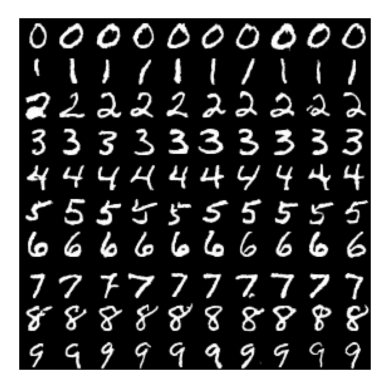

In [9]:
# ==================================================== #
# YOUR CODE HERE:
#   Among all images generated in the experiment,
#   show the image that you believe has the best generation quality.
#   You may use tools like matplotlib, PIL, OpenCV, ...

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the file path
file_path = "save/LM_experiment_2/images/generate_epoch_10.png"

# Load the image
img = mpimg.imread(file_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()


# ==================================================== #

**Inline Question: Discuss the effects of your modifications after you compare the generation performance under different configurations.**

The lower values for train and test noise loss indicate that the model is converging towards a better performance than achieved using the original parameters.

Changes I made to the DMConfig includes increasing T, the number of diffusion steps, which increases the overall amount of compute time it took to complete training and testing, with the hope that it would increase generation quality of the image. I also increased the number of features with the intent that it would allow the model to pick up on more intricate features and patterns in the data. I also increased omega based on the results seen testing different omegas in the previous steps. Lastly, I increased the mask_p value slightly, to encourage the model to learn more robust data representations.